In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack

#--------------------Setup the main directories------------------#
#Define the various directorieszz
script_dir = os.getcwd()                         #define current dir
main_dir = os.path.dirname(script_dir)           #go up of one directory
results_dir = os.path.join(main_dir, "figure")   #define results dir

if not os.path.exists(results_dir):              #if the directory does not exist create it
    os.mkdir(results_dir)


In [38]:
#Generate a sine signal plus a noise
def signal(t, A, f, An, fn):
    return A * np.sin(2*np.pi*f*t) + An * np.sin(2*np.pi*fn*t)

#create a digital low pass filter
def digitalLowPass(y, x, fs, w0):
    A = w0 / (2*fs + w0)
    b0 = 1
    b1 = 1
    a1 = ( 2*fs - w0 ) / (2*fs + w0)
    
    #direct form I
    for k in range(1, len(y)):
        y[k] = A*(b0*x[k]+b1*x[k-1]) + a1*y[k-1]
    
    return y


if __name__ == '__main__':
    #Parameters of the signal
    f = 4     #sine wave frequency [Hz]
    fn = 50   #noise frequency [Hz]
    A = 1     #sine magnitude
    An = 0.3  #noise magnitude
    
    t_start = 0  #start time of the signal [s]
    t_end = 1    #end time [s]
    fs = 800     #sampling frequency of the signal [Hz] --> ts = 1/fs
    
    #define time array
    t = np.linspace(t_start, t_end, (t_end - t_start)*fs)
    
    #signal
    y = signal(t, A, f, An, fn)
    
    #compute the Fast Fourier transform
    Y = fftpack.fft(y)
    freqs = fftpack.fftfreq(len(y)) * fs
    
    #response of digital low pass filter
    f0 = 5                                  #cut off frequency [Hz]
    w0 = 2*np.pi*f0
    ylp = np.zeros(len(y))                  #inizialize an array of y for the response  
    ylp = digitalLowPass(ylp, y, fs, w0)    #signal filtered
    
    #compute the Fast Fourier transform of the filtered signal
    Ylp = fftpack.fft(ylp)    

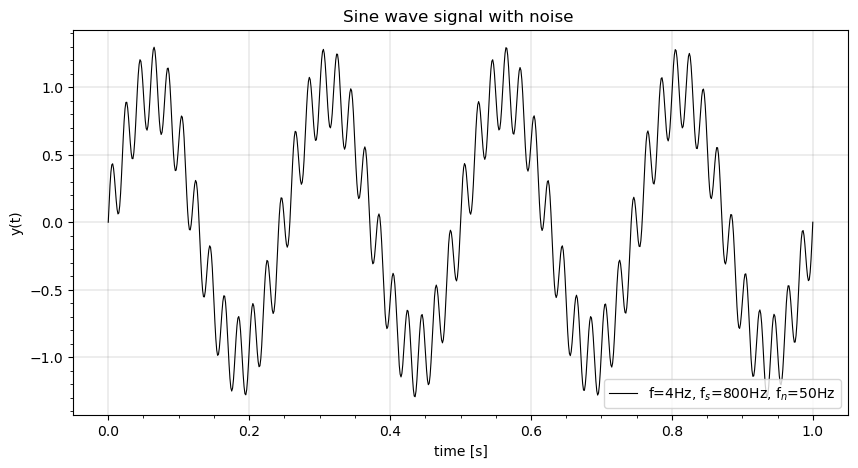

In [37]:
#--------------------------Plot results----------------------#
plt.rc('font',size=10)
plt.figure(figsize=(10,5))
plt.title("Sine wave signal with noise ")
plt.xlabel("time [s]")
plt.ylabel("y(t)")
plt.grid(color='gray',linewidth='0.2')
plt.minorticks_on()

plt.plot(t,y, linestyle = '-', linewidth = '0.8', marker = '', color = 'black', label = 'f=4Hz, f$_s$=800Hz, f$_n$=50Hz')
plt.legend(loc = 'lower right')

# save the plot in the results dir
out_name = os.path.join(results_dir, "signal_noise.png")
#plt.savefig(out_name)
plt.show()

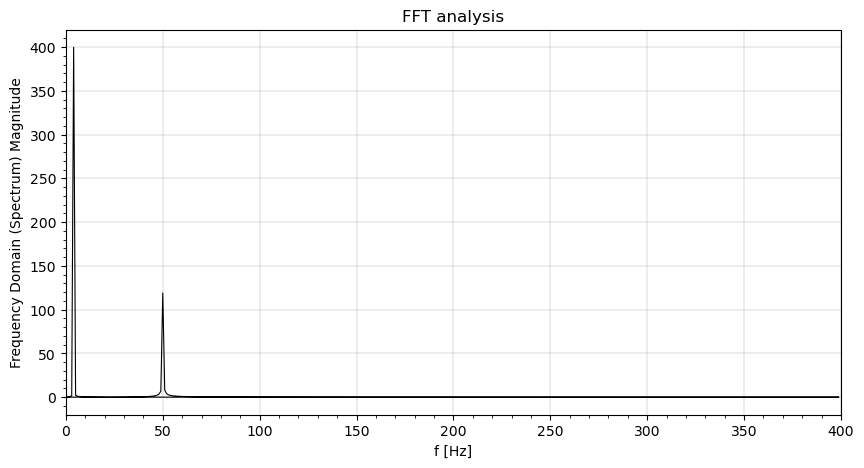

In [10]:
#--------------------------Plot results----------------------#
plt.rc('font',size=10)
plt.figure(figsize=(10,5))
plt.title("FFT analysis")
plt.xlabel("f [Hz]")
plt.ylabel("Frequency Domain (Spectrum) Magnitude")
plt.xlim(0,fs/2)
plt.grid(color='gray',linewidth='0.2')
plt.minorticks_on()

plt.plot(freqs,np.abs(Y), linestyle = '-', linewidth = '0.8', marker = '', color = 'black')

# save the plot in the results dir
out_name = os.path.join(results_dir, "fft_analysis.png")
#plt.savefig(out_name)
plt.show()

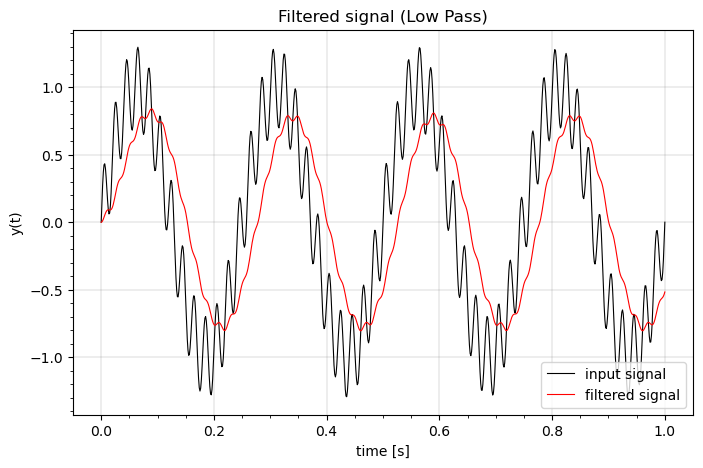

In [37]:
#--------------------------Plot results----------------------#
plt.rc('font',size=10)
plt.figure(figsize=(8,5))
plt.title("Filtered signal (Low Pass)")
plt.xlabel("time [s]")
plt.ylabel("y(t)")
plt.grid(color='gray',linewidth='0.2')
plt.minorticks_on()

plt.plot(t,y, linestyle = '-', linewidth = '0.8', marker = '', color = 'black', label = 'input signal')
plt.plot(t,ylp, linestyle = '-', linewidth = '0.8', marker = '', color = 'red', label = 'filtered signal')
plt.legend(loc = 'lower right')

# save the plot in the results dir
out_name = os.path.join(results_dir, "filtered_signal.png")
plt.savefig(out_name)
plt.show()


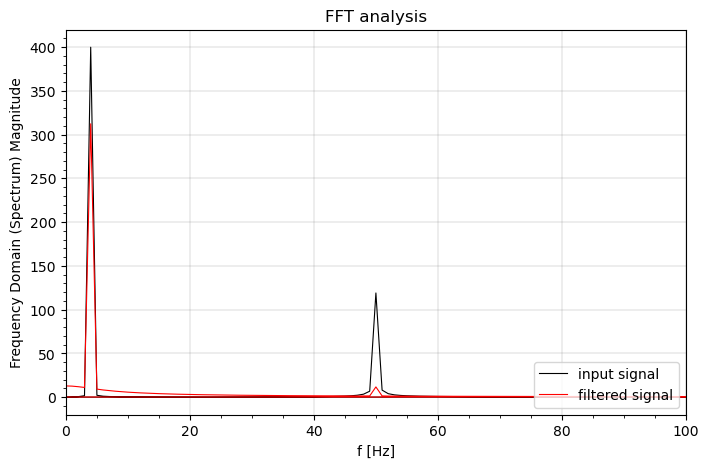

In [47]:
#--------------------------Plot results----------------------#
plt.rc('font',size=10)
plt.figure(figsize=(8,5))
plt.title("FFT analysis")
plt.xlabel("f [Hz]")
plt.ylabel("Frequency Domain (Spectrum) Magnitude")
plt.xlim(0,100)
plt.grid(color='gray',linewidth='0.2')
plt.minorticks_on()

plt.plot(freqs,np.abs(Y), linestyle = '-', linewidth = '0.8', marker = '', color = 'black', label = 'input signal')
plt.plot(freqs,np.abs(Ylp), linestyle = '-', linewidth = '0.8', marker = '', color = 'red', label = 'filtered signal')
plt.legend(loc = 'lower right')

# save the plot in the results dir
out_name = os.path.join(results_dir, "fft_analysis_filtered.png")
plt.savefig(out_name)
plt.show()